In [56]:
import tensorflow as tf
import tensorflow_probability as tfp
import pandas as pd
import random
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from IPython.display import clear_output
from scipy.interpolate import interp1d
from datetime import datetime
import os

import numpy as np
from tensorflow import keras
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
tfd = tfp.distributions

import keras
from keras.models import Sequential,Input,Model
from keras.layers import Dense, Dropout, Flatten

Num GPUs Available:  1


In [57]:
gpus = tf.config.list_physical_devices('GPU')
if gpus:
  # Restrict TensorFlow to only allocate 1GB of memory on the first GPU
  try:
    tf.config.experimental.set_virtual_device_configuration(
        gpus[0],
        [tf.config.experimental.VirtualDeviceConfiguration(memory_limit=10000)])
    logical_gpus = tf.config.experimental.list_logical_devices('GPU')
    print(len(gpus), "Physical GPUs,", len(logical_gpus), "Logical GPUs")
  except RuntimeError as e:
    # Virtual devices must be set before GPUs have been initialized
    print(e)

1 Physical GPUs, 1 Logical GPUs


In [58]:
z_max = 2.5

train_array = pd.read_csv('/mnt/data/HSC/3_model_comparison/training_'+str(z_max)+'_v2.csv')
train_array.drop(columns=['Unnamed: 0'], inplace=True)
train_array = np.asarray(train_array)

test_array = pd.read_csv('/mnt/data/HSC/3_model_comparison/testing_'+str(z_max)+'_v2.csv')
test_array.drop(columns=['Unnamed: 0'], inplace=True)
test_array = np.asarray(test_array)

In [59]:
OID_test = test_array[:,0]
X_test = test_array[:,[12,13,14,15,16]]
y_test = test_array[:,2]

In [60]:
sample_array = "[1, 1, 1, 1]"# "control" # "[1, 1, 1, 1]"

In [61]:
nnetwork = 7

In [62]:
X_total = list(train_array[:,[12,13,14,15,16]])
scaler = preprocessing.MinMaxScaler()
scaler.fit(X_total)

MinMaxScaler()

In [63]:
X = []
y = []

for i in range(2, nnetwork + 2):
    training_array_bin = pd.read_csv('/mnt/data/HSC/3_model_comparison/training_set_'+str(z_max)+'_'+sample_array+'#'+str(i)+'.csv')
    training_array_bin.drop(columns=['Unnamed: 0'], inplace=True)
    training_array_bin = np.asarray(training_array_bin)
    X_bin = list(training_array_bin[:,[12,13,14,15,16]])
    X_bin = scaler.transform(X_bin)
    y_bin = list(training_array_bin[:,2])
    X.append(X_bin)
    y.append(y_bin)
X = np.asarray(X)
y = np.asarray(y)

In [64]:
nensemble = 6

In [65]:
models = []

for i in range(0,nensemble):
    input_ = tf.keras.layers.Input(shape=X[0].shape[1:])
    hidden1 = tf.keras.layers.Dense(200, activation="tanh")(input_)
    hidden2 = tf.keras.layers.Dense(200, activation="tanh")(hidden1)
    hidden3 = tf.keras.layers.Dense(200, activation="tanh")(hidden2)
    hidden4 = tf.keras.layers.Dense(200, activation="relu")(hidden3)
    concat = tf.keras.layers.Concatenate()([input_, hidden4])
    output = tf.keras.layers.Dense(1)(concat)
    model = tf.keras.Model(inputs=[input_], outputs=[output])
    model.compile(optimizer='Adam', loss="mse",metrics=[tf.keras.metrics.MeanAbsoluteError()])
    models.append(model)

In [66]:
for i in range(0, nensemble):
    models[i].fit(X[i],y[i], epochs=50, batch_size = 5000, shuffle = True, verbose=1)

Epoch 1/50
126/126 [==============================] - 1s 2ms/step - loss: 0.3094 - mean_absolute_error: 0.4332
Epoch 2/50
126/126 [==============================] - 0s 2ms/step - loss: 0.1781 - mean_absolute_error: 0.2977
Epoch 3/50
126/126 [==============================] - 0s 2ms/step - loss: 0.1671 - mean_absolute_error: 0.2877
Epoch 4/50
126/126 [==============================] - 0s 2ms/step - loss: 0.1516 - mean_absolute_error: 0.2709
Epoch 5/50
126/126 [==============================] - 0s 2ms/step - loss: 0.1430 - mean_absolute_error: 0.2556
Epoch 6/50
126/126 [==============================] - 0s 2ms/step - loss: 0.1293 - mean_absolute_error: 0.2358
Epoch 7/50
126/126 [==============================] - 0s 2ms/step - loss: 0.1206 - mean_absolute_error: 0.2224
Epoch 8/50
126/126 [==============================] - 0s 2ms/step - loss: 0.1157 - mean_absolute_error: 0.2147
Epoch 9/50
126/126 [==============================] - 0s 2ms/step - loss: 0.1136 - mean_absolute_error: 0.2109
E

126/126 [==============================] - 0s 2ms/step - loss: 0.1027 - mean_absolute_error: 0.1900
Epoch 25/50
126/126 [==============================] - 0s 2ms/step - loss: 0.1032 - mean_absolute_error: 0.1912
Epoch 26/50
126/126 [==============================] - 0s 2ms/step - loss: 0.1024 - mean_absolute_error: 0.1899
Epoch 27/50
126/126 [==============================] - 0s 2ms/step - loss: 0.1017 - mean_absolute_error: 0.1879
Epoch 28/50
126/126 [==============================] - 0s 2ms/step - loss: 0.1010 - mean_absolute_error: 0.1875
Epoch 29/50
126/126 [==============================] - 0s 2ms/step - loss: 0.1012 - mean_absolute_error: 0.1878
Epoch 30/50
126/126 [==============================] - 0s 2ms/step - loss: 0.1009 - mean_absolute_error: 0.1880
Epoch 31/50
126/126 [==============================] - 0s 2ms/step - loss: 0.1008 - mean_absolute_error: 0.1888
Epoch 32/50
126/126 [==============================] - 0s 2ms/step - loss: 0.1002 - mean_absolute_error: 0.1867
Epoc

126/126 [==============================] - 0s 2ms/step - loss: 0.0934 - mean_absolute_error: 0.1809
Epoch 48/50
126/126 [==============================] - 0s 2ms/step - loss: 0.0931 - mean_absolute_error: 0.1806
Epoch 49/50
126/126 [==============================] - 0s 2ms/step - loss: 0.0934 - mean_absolute_error: 0.1824
Epoch 50/50
126/126 [==============================] - 0s 2ms/step - loss: 0.0927 - mean_absolute_error: 0.1807
Epoch 1/50
126/126 [==============================] - 0s 2ms/step - loss: 0.3186 - mean_absolute_error: 0.4448
Epoch 2/50
126/126 [==============================] - 0s 2ms/step - loss: 0.1763 - mean_absolute_error: 0.2977
Epoch 3/50
126/126 [==============================] - 0s 2ms/step - loss: 0.1604 - mean_absolute_error: 0.2827
Epoch 4/50
126/126 [==============================] - 0s 2ms/step - loss: 0.1528 - mean_absolute_error: 0.2739
Epoch 5/50
126/126 [==============================] - 0s 2ms/step - loss: 0.1420 - mean_absolute_error: 0.2567
Epoch 6/5

126/126 [==============================] - 0s 2ms/step - loss: 0.1070 - mean_absolute_error: 0.1981
Epoch 21/50
126/126 [==============================] - 0s 2ms/step - loss: 0.1063 - mean_absolute_error: 0.1968
Epoch 22/50
126/126 [==============================] - 0s 2ms/step - loss: 0.1066 - mean_absolute_error: 0.1974
Epoch 23/50
126/126 [==============================] - 0s 2ms/step - loss: 0.1053 - mean_absolute_error: 0.1950
Epoch 24/50
126/126 [==============================] - 0s 2ms/step - loss: 0.1052 - mean_absolute_error: 0.1950
Epoch 25/50
126/126 [==============================] - 0s 2ms/step - loss: 0.1040 - mean_absolute_error: 0.1926
Epoch 26/50
126/126 [==============================] - 0s 2ms/step - loss: 0.1040 - mean_absolute_error: 0.1924
Epoch 27/50
126/126 [==============================] - 0s 2ms/step - loss: 0.1040 - mean_absolute_error: 0.1929
Epoch 28/50
126/126 [==============================] - 0s 2ms/step - loss: 0.1029 - mean_absolute_error: 0.1917
Epoc

126/126 [==============================] - 0s 2ms/step - loss: 0.0932 - mean_absolute_error: 0.1796
Epoch 44/50
126/126 [==============================] - 0s 2ms/step - loss: 0.0935 - mean_absolute_error: 0.1808
Epoch 45/50
126/126 [==============================] - 0s 2ms/step - loss: 0.0931 - mean_absolute_error: 0.1800
Epoch 46/50
126/126 [==============================] - 0s 2ms/step - loss: 0.0925 - mean_absolute_error: 0.1801
Epoch 47/50
126/126 [==============================] - 0s 2ms/step - loss: 0.0925 - mean_absolute_error: 0.1793
Epoch 48/50
126/126 [==============================] - 0s 2ms/step - loss: 0.0925 - mean_absolute_error: 0.1797
Epoch 49/50
126/126 [==============================] - 0s 2ms/step - loss: 0.0917 - mean_absolute_error: 0.1776
Epoch 50/50
126/126 [==============================] - 0s 2ms/step - loss: 0.0919 - mean_absolute_error: 0.1783


In [67]:
y_predict = []
X_test = scaler.transform(X_test)

for i in range(0, nensemble):
    y_predict_single = models[i].predict(X_test)
    y_predict.append(np.transpose(y_predict_single)[0])

y_predict = np.transpose(y_predict)

In [68]:
mean_array = []
std_array = []
for i in range(0,len(X_test)):
    mean = np.mean(y_predict[i])
    std = np.std(y_predict[i])
    mean_array.append(mean)
    std_array.append(std)

In [69]:
overlap = 0
overlap_array = []
for i in range(0,len(X_test)):
    if np.abs(y_test[i]-mean_array[i])<=std_array[i]:
        overlap += 1
        overlap_array.append(1)
    else:
        overlap_array.append(0)

In [70]:
combined_array = np.transpose(np.vstack((y_test, mean_array, std_array, overlap_array)))

In [71]:
sorted_combined_array = sorted(combined_array, key=lambda x: x[0])

In [72]:
bins = int(z_max*10)
splitted_sorted_combined_array = np.array_split(sorted_combined_array,bins)
coverage = []
for i in range(0,bins):
    bins_count = 0
    for j in range(0,len(splitted_sorted_combined_array[i])):
        if splitted_sorted_combined_array[i][j][3] == 1:
            bins_count += 1
    coverage.append(bins_count/len(splitted_sorted_combined_array[i])/0.6827)
x_array = np.arange(0,z_max,z_max/bins)

In [73]:
# From Evan's code, didn't completely understand this part
def posterior_mean_field(kernel_size: int, bias_size: int, dtype: any) -> tf.keras.Model:
    """Specify the surrogate posterior over `keras.layers.Dense` `kernel` and `bias`."""
    n = kernel_size + bias_size
    c = np.log(np.expm1(1.))

    return tf.keras.Sequential([
        tfp.layers.VariableLayer(2 * n, dtype=dtype, initializer=lambda shape, dtype: random_gaussian_initializer(shape, dtype), trainable=True),
        tfp.layers.DistributionLambda(lambda t: tfd.Independent(
            tfd.Normal(loc=t[..., :n],
                       scale= + 10e-4*tf.nn.softplus(c + t[..., n:])),
            reinterpreted_batch_ndims=1)),
    ])

def prior_trainable(kernel_size: int, bias_size: int, dtype: any) -> tf.keras.Model:
    """Specify the prior over `keras.layers.Dense` `kernel` and `bias`."""
    n = kernel_size + bias_size

    return tf.keras.Sequential([
        tfp.layers.VariableLayer(n, dtype=dtype),  # Returns a trainable variable of shape n, regardless of input
        tfp.layers.DistributionLambda(lambda t: tfd.Independent(
            tfd.Normal(loc=t, scale=1),
            reinterpreted_batch_ndims=1)),
    ])

def random_gaussian_initializer(shape, dtype):
    n = int(shape / 2)
    loc_norm = tf.random_normal_initializer(mean=0., stddev=0.1)
    loc = tf.Variable(
        initial_value=loc_norm(shape=(n,), dtype=dtype)
    )
    scale_norm = tf.random_normal_initializer(mean=-3., stddev=0.1)
    scale = tf.Variable(
        initial_value=scale_norm(shape=(n,), dtype=dtype)
    )
    return tf.concat([loc, scale], 0)

def negative_loglikelihood(targets, estimated_distribution):
    return -estimated_distribution.log_prob(targets)

In [74]:
input_variational = tf.keras.layers.Input(shape=X[nnetwork - 1].shape[1:])
hidden1_variational = tfp.layers.DenseVariational(200, activation='tanh', input_shape=(5,),
                                      make_posterior_fn=posterior_mean_field,
                                      make_prior_fn=prior_trainable,
                                      kl_weight=1 / len(y[nnetwork - 1]))(input_variational)
hidden2_variational = tfp.layers.DenseVariational(200, activation='tanh', input_shape=(5,),
                                      make_posterior_fn=posterior_mean_field,
                                      make_prior_fn=prior_trainable,
                                      kl_weight=1 / len(y[nnetwork - 1]))(hidden1_variational)
hidden3_variational = tfp.layers.DenseVariational(200, activation='tanh', input_shape=(5,),
                                      make_posterior_fn=posterior_mean_field,
                                      make_prior_fn=prior_trainable,
                                      kl_weight=1 / len(y[nnetwork - 1]))(hidden2_variational)
hidden4_variational = tfp.layers.DenseVariational(200, activation='relu', input_shape=(5,),
                                      make_posterior_fn=posterior_mean_field,
                                      make_prior_fn=prior_trainable,
                                      kl_weight=1 / len(y[nnetwork - 1]))(hidden3_variational)   

concat_variational = tf.keras.layers.Concatenate()([input_variational, hidden4_variational])

distribution_params_variational = tf.keras.layers.Dense(units=2)(concat_variational)

output_variational = tfp.layers.IndependentNormal(1)(distribution_params_variational)

model_variational = tf.keras.Model(inputs=[input_variational], outputs=[output_variational])

model_variational.compile(optimizer='adam', loss=negative_loglikelihood,metrics=[keras.metrics.RootMeanSquaredError()])

model_variational.summary()

Model: "model_13"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_14 (InputLayer)           [(None, 5)]          0                                            
__________________________________________________________________________________________________
dense_variational_4 (DenseVaria (None, 200)          3600        input_14[0][0]                   
__________________________________________________________________________________________________
dense_variational_5 (DenseVaria (None, 200)          120600      dense_variational_4[0][0]        
__________________________________________________________________________________________________
dense_variational_6 (DenseVaria (None, 200)          120600      dense_variational_5[0][0]        
___________________________________________________________________________________________

In [75]:
model_variational.fit(X[nnetwork - 1],y[nnetwork - 1], epochs = 50, batch_size = 5000, shuffle = True, verbose=1)

Epoch 1/50
126/126 [==============================] - 2s 3ms/step - loss: 261490540544.0000 - root_mean_squared_error: 1.1270
Epoch 2/50
126/126 [==============================] - 0s 3ms/step - loss: 214.2629 - root_mean_squared_error: 0.8796
Epoch 3/50
126/126 [==============================] - 0s 3ms/step - loss: 2.6289 - root_mean_squared_error: 0.7895
Epoch 4/50
126/126 [==============================] - 0s 3ms/step - loss: 2.0253 - root_mean_squared_error: 0.7421
Epoch 5/50
126/126 [==============================] - 0s 3ms/step - loss: 1.9796 - root_mean_squared_error: 0.7124
Epoch 6/50
126/126 [==============================] - 0s 3ms/step - loss: 1.9570 - root_mean_squared_error: 0.6920
Epoch 7/50
126/126 [==============================] - 0s 3ms/step - loss: 1.9443 - root_mean_squared_error: 0.6770
Epoch 8/50
126/126 [==============================] - 0s 3ms/step - loss: 1.9301 - root_mean_squared_error: 0.6653
Epoch 9/50
126/126 [==============================] - 0s 3ms/step -

In [76]:
y_predict_variational = model_variational(X_test)

In [77]:
model_variational(np.array([X[0][0]])).mean()

<tf.Tensor: shape=(1, 1), dtype=float32, numpy=array([[0.55312324]], dtype=float32)>

In [78]:
y[0][0]

0.511308014

In [79]:
y_predict_variational_mean = np.asarray(y_predict_variational.mean())[:,0]

In [80]:
y_predict_variational_std = np.asarray(y_predict_variational.stddev())[:,0]

In [81]:
overlap_variational = 0
overlap_array_variational = []
for i in range(0,len(X_test)):
    if np.abs(y_test[i]-y_predict_variational_mean[i])<=y_predict_variational_std[i]:
        overlap_variational += 1
        overlap_array_variational.append(1)
    else:
        overlap_array_variational.append(0)

In [82]:
combined_array_variational = np.transpose(np.vstack((y_test,y_predict_variational_mean,y_predict_variational_std,overlap_array_variational)))

In [83]:
sorted_combined_array_variational = sorted(combined_array_variational, key=lambda x: x[0])

In [84]:
bins_variational = int(z_max*10)
splitted_sorted_combined_array_variational = np.array_split(sorted_combined_array_variational,bins)
coverage_variational = []
for i in range(0,bins_variational):
    bins_count_variational = 0
    for j in range(0,len(splitted_sorted_combined_array_variational[i])):
        if splitted_sorted_combined_array_variational[i][j][3] == 1:
            bins_count_variational += 1
    coverage_variational.append(bins_count_variational/len(splitted_sorted_combined_array_variational[i])/0.6827)
x_array = np.arange(0,z_max,z_max/bins_variational)

In [85]:
def bias(true, predicted):
    return (predicted - true)/(1 + true)

In [86]:
bias_array = []
for i in range(0,len(y_test)):
    bias_array.append(bias(y_test[i],mean_array[i]))

In [87]:
combined_array_scatter = np.transpose(np.vstack((y_test,bias_array)))
sorted_combined_array_scatter = sorted(combined_array_scatter, key=lambda x: x[0])
bins_scatter = int(z_max*10)
splitted_sorted_combined_array_scatter = np.array_split(sorted_combined_array_scatter,bins_scatter)
scatter_array = []
for i in range(0,bins_scatter):
    scatter = np.std(splitted_sorted_combined_array_scatter[i])
    scatter_array.append(scatter)
x_array_scatter = np.arange(0,z_max,z_max/bins)

In [88]:
combined_array_outlier = np.transpose(np.vstack((y_test,bias_array)))
sorted_combined_array_outlier = sorted(combined_array_outlier, key=lambda x: x[0])
bins_outlier = int(z_max*10)
splitted_sorted_combined_array_outlier = np.array_split(sorted_combined_array_outlier,bins_outlier)
outlier_array = []
for i in range(0,bins_scatter):
    outlier_count = 0
    for j in range(0,len(splitted_sorted_combined_array_outlier[i])):
        if np.abs(splitted_sorted_combined_array_outlier[i][j][1]) >= 1/4:
            outlier_count += 1
    outlier_array.append(outlier_count/len(X_test))
x_array_outlier = np.arange(0,z_max,z_max/bins)

In [89]:
bias_array_variational = []
for i in range(0,len(y_test)):
    bias_array_variational.append(bias(y_test[i],y_predict_variational_mean[i]))

In [90]:
sample_array_string = ""
for i in sample_array:
    sample_array_string += str(i)
    sample_array_string += "_"

ensemble_prediction = np.transpose(np.vstack((OID_test, y_test, mean_array, std_array)))
bayesian_prediction = np.transpose(np.vstack((OID_test, y_test, y_predict_variational_mean, y_predict_variational_std)))

df = pd.DataFrame(ensemble_prediction, columns=['object_id', 'specz_redshift', 'predicted_redshift',
       'uncertainty'])
df.to_csv('/mnt/data/HSC/3_model_comparison/ensemble_predictions_'+str(z_max)+'_'+str(sample_array)+'_v2.csv')

df = pd.DataFrame(bayesian_prediction, columns=['object_id', 'specz_redshift', 'predicted_redshift',
       'uncertainty'])
df.to_csv('/mnt/data/HSC/3_model_comparison/bayesian_predictions_'+str(z_max)+'_'+str(sample_array)+'_v2.csv')

In [91]:
from scipy.stats import gaussian_kde
xy = np.asarray(np.vstack([y_test,mean_array])).astype('float32')
z = gaussian_kde(xy)(xy)

(0.0, 2.5)

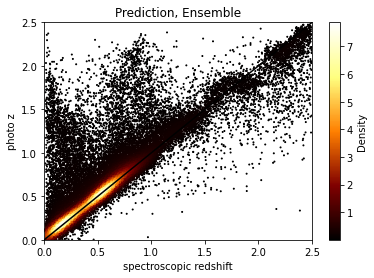

In [92]:
plt.rcParams.update({'font.size': 10})
fig, ax = plt.subplots()
scatter_plot = ax.scatter(y_test, mean_array, c = z, s = 1, edgecolor = None, cmap='afmhot')
plt.colorbar(scatter_plot, label = 'Density')
plt.title('Prediction, Ensemble')
plt.xlabel('spectroscopic redshift')
plt.ylabel('photo z')
plt.plot([0, z_max], [0, z_max],color = 'black')
plt.xlim([0, z_max])
plt.ylim([0, z_max])

(0.0, 2.5)

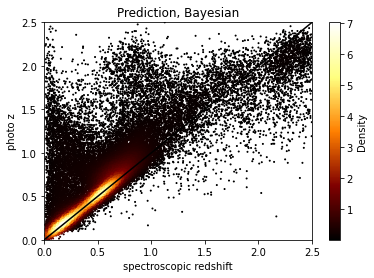

In [93]:
xy_variational = np.asarray(np.vstack([y_test,y_predict_variational_mean])).astype('float32')
z_variational = gaussian_kde(xy_variational)(xy_variational)
fig, ax = plt.subplots()
scatter_plot = ax.scatter(y_test, y_predict_variational_mean, c = z_variational, s = 1, edgecolor = None, cmap='afmhot')
plt.colorbar(scatter_plot, label = 'Density')
plt.title('Prediction, Bayesian')
plt.xlabel('spectroscopic redshift')
plt.ylabel('photo z')
plt.plot([0, z_max], [0, z_max],color = 'black')
plt.xlim([0, z_max])
plt.ylim([0, z_max])

Coverage: 0.46904613188185956


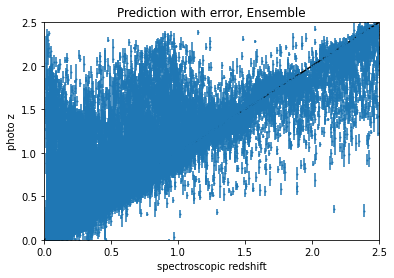

In [94]:
fig, ax = plt.subplots()
error_plot = ax.errorbar(y_test, mean_array, yerr = std_array, fmt="o" ,markersize=1)
plt.title('Prediction with error, Ensemble')
plt.xlabel('spectroscopic redshift')
plt.ylabel('photo z')
plt.plot([0, z_max], [0, z_max],color = 'black')
plt.xlim([0, z_max])
plt.ylim([0, z_max])
print("Coverage: "+str(overlap/len(X_test)))

Coverage: 0.7479789417328455


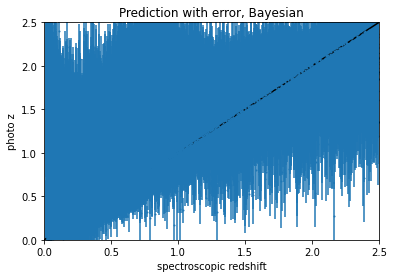

In [95]:
fig, ax = plt.subplots()
error_plot = ax.errorbar(y_test, y_predict_variational_mean, yerr = y_predict_variational_std, fmt="o", markersize=1)
plt.title('Prediction with error, Bayesian')
plt.xlabel('spectroscopic redshift')
plt.ylabel('photo z')
plt.plot([0, z_max], [0, z_max],color = 'black')
plt.xlim([0, z_max])
plt.ylim([0, z_max])
print("Coverage: "+str(overlap_variational/len(X_test)))

Coverage: 0.46904613188185956


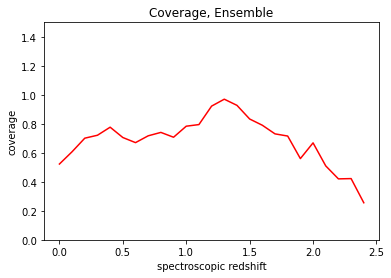

In [96]:
plt.plot(x_array, coverage, c = 'red')
plt.title('Coverage, Ensemble')
plt.xlabel('spectroscopic redshift')
plt.ylabel('coverage')
plt.ylim([0,1.5])
print("Coverage: "+str(overlap/len(X_test)))

Coverage: 0.7479789417328455


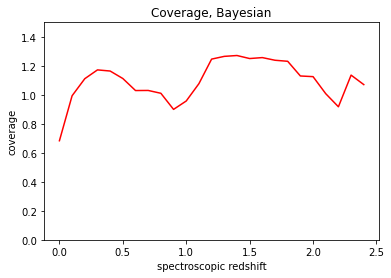

In [97]:
plt.plot(x_array, coverage_variational, c = 'red')
plt.title('Coverage, Bayesian')
plt.xlabel('spectroscopic redshift')
plt.ylabel('coverage')
plt.ylim([0,1.5])
print("Coverage: "+str(overlap_variational/len(X_test)))

(-1.0, 1.0)

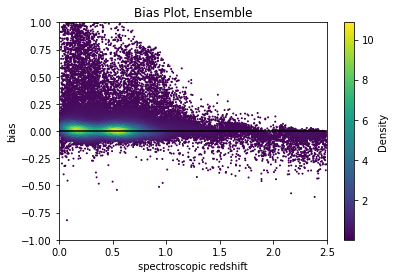

In [98]:
xy_bias = np.asarray(np.vstack([y_test,bias_array])).astype('float32')
z_bias = gaussian_kde(xy_bias)(xy_bias)
fig, ax = plt.subplots()
scatter_plot = ax.scatter(y_test, bias_array, c = z_bias, s = 1, edgecolor = None, label = 'Data')
plt.colorbar(scatter_plot, label = 'Density')
plt.title('Bias Plot, Ensemble')
plt.xlabel('spectroscopic redshift')
plt.ylabel('bias')
plt.plot([0, z_max], [0, 0], color = 'black')
plt.xlim([0, z_max])
plt.ylim([-1, 1])

(-1.0, 1.0)

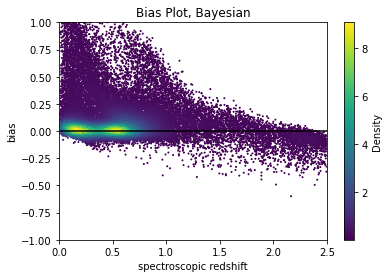

In [99]:
xy_bias_variational = np.asarray(np.vstack([y_test,bias_array_variational])).astype('float32')
z_bias_variational = gaussian_kde(xy_bias_variational)(xy_bias_variational)
fig, ax = plt.subplots()
scatter_plot = ax.scatter(y_test, bias_array_variational, c = z_bias_variational, s = 1, edgecolor = None, label = 'Data')
plt.colorbar(scatter_plot, label = 'Density')
plt.title('Bias Plot, Bayesian')
plt.xlabel('spectroscopic redshift')
plt.ylabel('bias')
plt.plot([0, z_max], [0, 0], color = 'black')
plt.xlim([0, z_max])
plt.ylim([-1, 1])

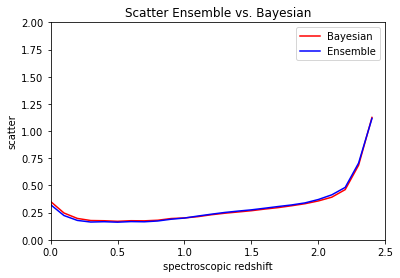

In [100]:
combined_array_scatter_variational = np.transpose(np.vstack((y_test,bias_array_variational)))
sorted_combined_array_scatter_variational = sorted(combined_array_scatter_variational, key=lambda x: x[0])
bins_scatter_variational = int(z_max*10)
splitted_sorted_combined_array_scatter_variational = np.array_split(sorted_combined_array_scatter_variational,bins_scatter_variational)
scatter_array_variational = []
for i in range(0,bins_scatter_variational):
    scatter_variational = np.std(splitted_sorted_combined_array_scatter_variational[i])
    scatter_array_variational.append(scatter_variational)
x_array_scatter = np.arange(0,z_max,z_max/bins)
plt.plot(x_array_scatter, scatter_array_variational, c = 'red', label = 'Bayesian')
plt.plot(x_array_scatter, scatter_array, c = 'blue', label = 'Ensemble')
plt.title('Scatter Ensemble vs. Bayesian')
plt.xlabel('spectroscopic redshift')
plt.ylabel('scatter')
plt.xlim([0,z_max])
plt.ylim([0,2])
plt.legend()

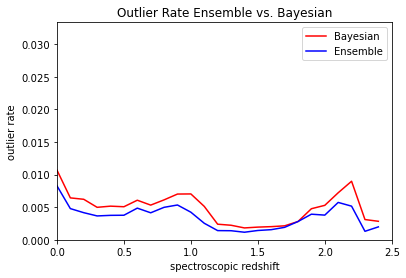

In [101]:
combined_array_outlier_variational = np.transpose(np.vstack((y_test,bias_array_variational)))
sorted_combined_array_outlier_variational = sorted(combined_array_outlier_variational, key=lambda x: x[0])
bins_outlier_variational = int(z_max*10)
splitted_sorted_combined_array_outlier_variational = np.array_split(sorted_combined_array_outlier_variational,bins_outlier_variational)
outlier_array_variational = []
for i in range(0,bins_scatter_variational):
    outlier_count_variational = 0
    for j in range(0,len(splitted_sorted_combined_array_outlier_variational[i])):
        if np.abs(splitted_sorted_combined_array_outlier_variational[i][j][1]) >= 1/4:
            outlier_count_variational += 1
    outlier_array_variational.append(outlier_count_variational/len(X_test))
x_array_outlier = np.arange(0,z_max,z_max/bins)
plt.plot(x_array_outlier, outlier_array_variational, c = 'red', label = 'Bayesian')
plt.plot(x_array_outlier, outlier_array, c = 'blue', label = 'Ensemble')
plt.title('Outlier Rate Ensemble vs. Bayesian')
plt.xlabel('spectroscopic redshift')
plt.ylabel('outlier rate')
plt.xlim([0,z_max])
plt.ylim([0,1/30])
plt.legend()

In [102]:
# END